# CMSE 201 Final Project
## Emma Huizenga 
## Section 006 
## 04.23.25

# *The Socioeconomic Consequences of Abortion Restrictions*

## Background and Motivation

Since the annulment of reproductive rights in 2022, the United States has witnessed a significant divergence in abortion policies across states. While some states have enacted stringent restrictions or total bans, others have moved to safeguard and expand access to abortion services. This policy fragmentation presents a unique opportunity to examine the broader implications of abortion access, particularly concerning women’s economic participation and state-level economic performance. 

I was especially interested in exploring how these policies might influence women’s economic outcomes, including workforce participation. Access to reproductive healthcare, including abortion services, is intrinsically linked to women’s ability to make decisions about their education, careers, and family planning. Restrictions on such access can impede women’s participation in the labor force, affecting not only individual economic outcomes but also the broader economic health of states.

Moreover, recent analyses underscore the economic ramifications of restrictive abortion policies. According to the Institute for Women’s Policy Research (IWPR), states with abortion bans or severe restrictions experience notable economic losses. For instance, Michigan faces an estimated annual GDP loss of 1.3%, amounting to over 8 billion dollars, alongside a 1.9% reduction in labor force participation among women aged 15 to 44. Nationally, such restrictions are projected to cost the U.S. economy approximately 68 billion dollars annually, with the potential to increase the national GDP by nearly half a percentage point if these restrictions were lifted.

Therefore, this project aims to investigate the economic consequences of abortion policy variations across states, focusing on metrics such as GDP fluctuations and changes in women’s labor force participation. By analyzing these factors, my analysis seeks to illuminate the intersection between reproductive rights and economic outcomes, providing insights that could be useful for public discourse. So, how does abortion access impact women’s workforce participation and a state’s economy?

## Data and Algorithm Contexting

For my project, I will use a curve-fitting approach to analyze the relationship between the restrictiveness of state abortion policies and their economic impact, specifically focusing on women’s labor force participation and GDP loss. I selected an **exponential model** because it best captured the observed pattern in the data. This choice reflects the assumption that more severe restrictions may lead to disproportionately large economic impacts.

The model relies on several key assumptions. First, it assumes that abortion restrictions have measurable economic effects and that these effects are captured adequately by the available data I will be using from 2022 and 2023. It also assumes that the `restrictiveness_score` I developed (an ordinal scale ranging from least to most severe restrictions) appropriately captures variation in policy environments across states. Lastly, it assumes that other economic or social policies remain relatively stable or exert minimal influence on the outcomes being studied. 

There are, however, important limitations and potential sources of bias. Because the data only span two years following the fall of Roe v. Wade, the model may not capture longer-term effects or delayed socioeconomic consequences. Excluding states that didn’t pass new abortion legislation in 2022 or 2023 introduces selection bias, as it removes states with potentially significant existing restrictions from the analysis. Moreover, unaccounted for confounding variables, such as broader economic conditions or state-level differences in labor markets, could influence the outcomes, complicating efforts to isolate the effect of abortion policy alone.

These assumptions and limitations affect the strength of any claims I can make. While the model identifies patterns between policy severity and economic outcomes, it cannot establish causation. To address these concerns, I am approaching the analysis as exploratory rather than conclusive. I will clearly communicate the study’s limitations and contextualize any findings within the broader complexity of modeling such policy impacts. Ultimately, this project serves as a starting point for understanding post-Roe economic shifts and highlights the need for continued research using longer time series and more comprehensive policy data.

The primary variables for this analysis come from the Institute for Women’s Policy Research and include the average annual economic loss as a percentage of state GDP, as well as the average annual percentage loss in labor force participation among women aged 15–44. The abortion policy data were compiled by Lola Browne, a research fellow at Michigan State University’s Institute for Public Policy and Social Research (IPPSR), and are organized as a binary-coded, state-year panel dataset. A limitation of this dataset is that it only captures whether a restriction was passed in a specific year. For example, if a state passed a restriction in 2022 but not in 2023, the 2023 observation is coded as 0, failing to reflect that a restrictive policy is still in effect.

To mitigate this issue, I chose to focus solely on states that passed at least one abortion restriction in either 2022 or 2023, excluding those with no legislative activity in both years. While this helps reduce data distortion, it may limit the generalizability of the analysis and complicate interpretation of the broader impact of abortion restrictions across all states.

## Methodology

To analyze the relationship between abortion restrictions and their socioeconomic impacts, I use a curve-fitting approach to model the effects of restrictive abortion policies on two outcomes: (1) the average annual percentage loss in labor force participation among women aged 15–44, and (2) the average annual economic loss as a percentage of state GDP.

I began by importing a dataset from the Institute for Women’s Policy Research (IWPR), which contains state-level estimates of labor force and economic impacts for the years 2022 and 2023. I then merged this dataset with a binary-coded, state-year abortion policy dataset developed by Lola Browne, a research fellow at the Institute for Public Policy and Social Research (IPPSR) at Michigan State University. This dataset records whether a given state passed a restrictive abortion law in 2022 or 2023.

To reduce inconsistencies, I excluded states that did not pass a law in either year. This decision helps avoid the misinterpretation that states with restrictions enacted in 2022 but not again in 2023 had no restrictions in place. As stated previously, this filtering introduces its own limitation, by focusing only on states with recent policy activity, the analysis omits states where long-standing restrictions remain in effect but were not legislatively updated in these two years. As a result, the findings may not reflect the full national impact of abortion policy on socioeconomic outcomes.

To create a more interpretable independent variable, I recoded the original `ban_code` variable into an ordinal scale named `restrictiveness_score`, which captures the relative severity of each restriction. This new scale ranges from 1 (least restrictive) to 8 (most restrictive), allowing for a more nuanced analysis of policy intensity.

Original `ban_code` values:
- 8 = Total Ban
- 2 = Trigger Ban
- 1 = Pre-Roe Ban
- 7 = Texas SB8 Copycat Ban
- 3 = Gestational Ban
- 4 = Viability Ban
- 5 = Method Ban
- 6 = Reason Ban

Rearranged into `restrictiveness_score` (ordinal):
- 1 = Reason Ban
- 2 = Method Ban
- 3 = Viability Ban
- 4 = Gestational Ban
- 5 = Texas SB8 Copycat Ban
- 6 = Pre-Roe Ban
- 7 = Trigger Ban
- 8 = Total Ban

This rearrangement is based on the relative enforcement severity of the restrictions, with total bans representing the most severe curtailment of access.

Using the `restrictiveness_score` variable, I employed an exponential curve-fitting model to analyze the relationship between abortion policy severity and its socioeconomic impacts. I decided that the exponential model may best capture the observed trends between policy restrictiveness and both labor force participation and economic loss. This model reflects the idea that the effects of increasingly severe abortion restrictions may grow at an accelerating rate, rather than in a linear or gradual pattern. 

Model performance was evaluated using R² values, which measure the proportion of variance in the outcome variable explained by the model. The model with the highest R² was selected as the best-fitting curve.

In [1]:
# importing and cleaning data
import pandas as pd
import numpy as np
import re

df = pd.read_csv("iwpr_data.csv", delimiter='\t')

# renaming columns
df.rename(columns={'Average Annual Economic Loss as a % of State GDP': 'percent_gdp_loss'}, inplace=True)
df.rename(columns={'Total Average Annual Economic Loss': 'gdp_loss'}, inplace=True)
df.rename(columns={'Average Annual % Labor Force Loss Women Age 15-44': 'percent_labor_loss'}, inplace=True)
df.rename(columns={'Average Annual Labor Force Loss Women Age 15-44': 'labor_loss'}, inplace=True)

#creating function to strip away percent symbol
def clean_percent(value):
    if isinstance(value, str):  
        value = re.sub(r'[^\d.-]', '', value)  
        return float(value) if value else None  
    return value  

df['percent_gdp_loss'] = df['percent_gdp_loss'].apply(clean_percent)
df['percent_labor_loss'] = df['percent_labor_loss'].apply(clean_percent)

# looking at data
df.head((10))

,State,percent_gdp_loss,gdp_loss,percent_labor_loss,labor_loss,Year
0,Alabama,0.8,"2,364,285,119",1.3,"8,273",2023
1,Alaska,0.2,"155,175,880",0.6,573,2023
2,Arizona,0.6,"2,778,486,472",0.8,"7,825",2023
3,Arkansas,0.9,"1,466,702,581",1.2,"4,827",2023
4,California,0.1,"2,214,767,742",0.1,"6,332",2023
5,Colorado,0.1,"742,705,190",0.2,"1,814",2023
6,Connecticut,0.3,"839,768,005",0.4,"1,931",2023
7,Delaware,0.2,"215,596,233",0.4,587,2023
8,District of Columbia,0.0,"72,181,999",0.1,123,2023
9,Florida,0.7,"11,329,196,937",1.2,"31,747",2023


In [425]:
#importing abortion policy data
abortion_policy = pd.read_excel("abortion_policy.xlsx")

#cleaning column names and dropping reference column 
abortion_policy.rename(columns={'Types of Bans Post Dobbs (0 = No Policy, 1 = Pre-Roe Ban, 2 = Trigger Ban, 3 = Gestational Ban, 4 = Viability Ban, 5 = Method Ban, 6 = Reason Ban, 7 = Texas SB8 Copycat Ban, 8 = Total Ban)': 'ban_code'}, inplace=True)
abortion_policy = abortion_policy.drop('Reference', axis=1)
restrictive_df = abortion_policy[abortion_policy['ban_code'] != 0

# defining the mapping for restrictivness variable
restrictiveness_map = {
    8: 8,  # total Ban
    2: 7,  # trigger Ban
    1: 6,  # pre-Roe Ban
    7: 5,  # texas SB8 Copycat Ban
    3: 4,  # gestational Ban
    4: 3,  # viability Ban
    5: 2,  # method Ban
    6: 1   # reason Ban
}

# creating restrictivness_score and cleaning state variable
restrictive_df["restrictiveness_score"] = restrictive_df["ban_code"].map(restrictiveness_map)

restrictive_df['State'] = restrictive_df['State'].str.strip() 
restrictive_df['State'] = restrictive_df['State'].replace({'D.C.': 'District of Columbia'})

#viewing data
restrictive_df.head((10))

/var/folders/3_/jvlvm2c14_1_7sy0yqs2ym880000gn/T/ipykernel_8524/3430402841.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restrictive_df["restrictiveness_score"] = restrictive_df["ban_code"].map(restrictiveness_map)
/var/folders/3_/jvlvm2c14_1_7sy0yqs2ym880000gn/T/ipykernel_8524/3430402841.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restrictive_df['State'] = restrictive_df['State'].str.strip()
/var/folders/3_/jvlvm2c14_1_7sy0yqs2ym880000gn/T/ipykernel_8524/3430402841.py:43: SettingWithCopyWar

,State,Year,ban_code,restrictiveness_score
0,Alabama,2022,8,8
4,Arizona,2022,6,1
5,Arizona,2022,3,4
6,Arizona,2022,1,6
8,Arkansas,2022,8,8
9,Arkansas,2022,3,4
10,Arkansas,2022,2,7
16,Connecticut,2022,4,3
20,Florida,2023,8,8
21,Florida,2022,3,4


In [427]:
# merging datasets
merged_df = pd.merge(restrictive_df, df, on=["State", "Year"], how="left")

# taking away $ symbol 
merged_df['gdp_loss'] = merged_df['gdp_loss'].replace('[\$]', '', regex=True)

merged_df.head((10))

,State,Year,ban_code,restrictiveness_score,percent_gdp_loss,gdp_loss,percent_labor_loss,labor_loss
0,Alabama,2022,8,8,0.9,"2,381,904,951",1.6,"9,608"
1,Arizona,2022,6,1,1.0,"4,519,289,297",1.7,"16,480"
2,Arizona,2022,3,4,1.0,"4,519,289,297",1.7,"16,480"
3,Arizona,2022,1,6,1.0,"4,519,289,297",1.7,"16,480"
4,Arkansas,2022,8,8,1.2,"1,934,189,137",2.0,"7,786"
5,Arkansas,2022,3,4,1.2,"1,934,189,137",2.0,"7,786"
6,Arkansas,2022,2,7,1.2,"1,934,189,137",2.0,"7,786"
7,Connecticut,2022,4,3,0.4,"1,403,507,109",0.8,"4,065"
8,Florida,2023,8,8,0.7,"11,329,196,937",1.2,"31,747"
9,Florida,2022,3,4,0.8,"11,143,499,582",1.5,"38,850"


After cleaning and exploring the datasets, I created a scatterplot to visualize each state’s abortion restrictiveness using `restrictiveness_score`. To add depth to the visualization, I incorporated color to represent the projected labor force loss percentage among women and adjusted the size of each point to reflect the state’s annual economic loss as a percentage of its GDP. This visual helps illustrate the relationship between policy severity and its potential socioeconomic impacts across states.

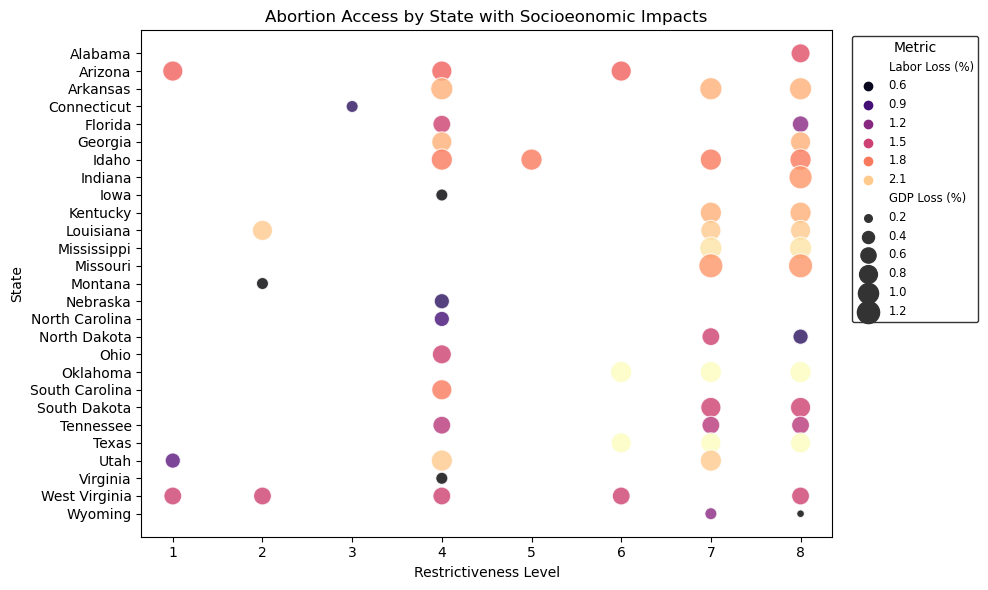

In [641]:
import matplotlib.pyplot as plt
import seaborn as sns

#renaming column names for legend
p1 = merged_df.rename(columns={
    'percent_labor_loss': 'Labor Loss (%)',
    'percent_gdp_loss': 'GDP Loss (%)'
})

#plotting
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=p1,
    x='restrictiveness_score',
    y='State',
    size='GDP Loss (%)',
    hue='Labor Loss (%)',
    palette = "magma",
    sizes=(30, 300),
    alpha=.8,
    legend='brief'
)

leg = plt.legend(
    title='Metric',
    bbox_to_anchor=(1.02, 1),  
    loc='upper left',          
    fontsize='small',
    title_fontsize='medium',
)

leg.get_frame().set_edgecolor('black')
plt.title('Abortion Access by State with Socioeonomic Impacts')
plt.xlabel('Restrictiveness Level')
plt.ylabel('State')
plt.tight_layout()

plt.savefig("my_plot.pdf", dpi=300, bbox_inches='tight')

plt.show()

I am now applying curve-fitting techniques using an exponential model to examine the association between abortion policy restrictiveness and two key outcomes: the projected loss in women’s labor force participation and the economic loss as a percentage of state GDP. The exponential model I am using takes the general form:

y = a * e^(b * x)

Where:
- y represents the socioeconomic outcome (either labor force loss or GDP loss),
- x is the abortion restrictiveness score,
- a is the baseline value (i.e., the expected outcome when x = 0),
- b reflects the rate at which the outcome changes as restrictiveness increases.

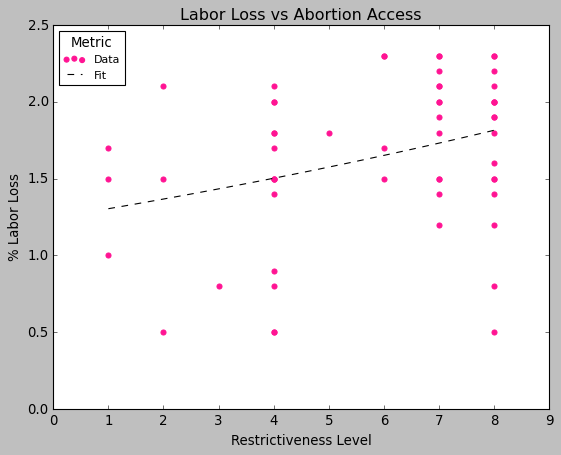

In [645]:
# model for percent_labor_loss
from scipy.optimize import curve_fit

# creating x and y values
x = merged_df['restrictiveness_score'].values
y = merged_df['percent_labor_loss'].values

# creating exp. growth function 
def exp_model(x, a, b):
    return a * np.exp(b * x)

# removing rows where either x or y is missing (NaN) or has infinite values
mask = np.isfinite(x) & np.isfinite(y)
x_clean = x[mask]
y_clean = y[mask]

# fitting the exponential model to the cleaned data & unpacking the fitted parameters from the result
params, covariance = curve_fit(exp_model, x_clean, y_clean)
a_fit, b_fit = params

# generate 100 evenly spaced x-values across the range of the original x data
x_range = np.linspace(min(x), max(x), 100)

# using the fitted exponential model to calculate predicted y-values for this x range
# this creates the smooth curve of best fit
y_fit = exp_model(x_range, a_fit, b_fit)

#plotting results
plt.style.use('classic')

plt.scatter(x, y, label='Data', color = 'deeppink')
plt.plot(x_range, y_fit, color='black', label='Fit', linestyle='--')
plt.xlabel('Restrictiveness Level')
plt.ylabel('% Labor Loss')

plt.legend(
    title='Metric',
    loc='upper left',          
    fontsize='small',
    title_fontsize='medium',
)

plt.title('Labor Loss vs Abortion Access')

plt.savefig("my_plot1.pdf", dpi=300, bbox_inches='tight')

plt.show()

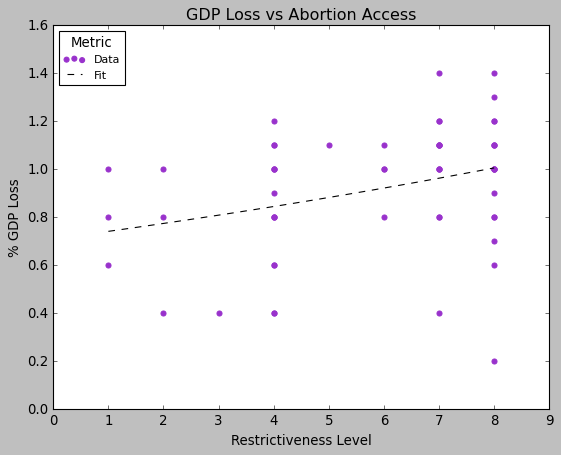

In [643]:
# model for percent_gdp_loss 

# creating x and y values
x1 = merged_df['restrictiveness_score'].values
y1 = merged_df['percent_gdp_loss'].values

# removing rows where either x or y is missing (NaN) or has infinite values
mask = np.isfinite(x1) & np.isfinite(y1)
x_clean1 = x1[mask]
y_clean1 = y1[mask]

# fitting the exponential model to the cleaned data & unpacking the fitted parameters from the result
params1, covariance1 = curve_fit(exp_model, x_clean1, y_clean1)
a_fit1, b_fit1 = params1

# generate 100 evenly spaced x-values across the range of the original x data
x_range = np.linspace(min(x), max(x), 100)

# using the fitted exponential model to calculate predicted y-values for this x range
# this creates the smooth curve of best fit
y_fit1 = exp_model(x_range, a_fit1, b_fit1)

# plotting results
plt.style.use('classic')

plt.scatter(x1, y1, label='Data', color = 'darkorchid')
plt.plot(x_range, y_fit1, color='black', label='Fit', linestyle='--')
plt.xlabel('Restrictiveness Level')
plt.ylabel('% GDP Loss')
plt.title('GDP Loss vs Abortion Access')

plt.legend(
    title='Metric',
    loc='upper left',          
    fontsize='small',
    title_fontsize='medium',
)

plt.savefig("my_plot2.pdf", dpi=300, bbox_inches='tight')

plt.show()

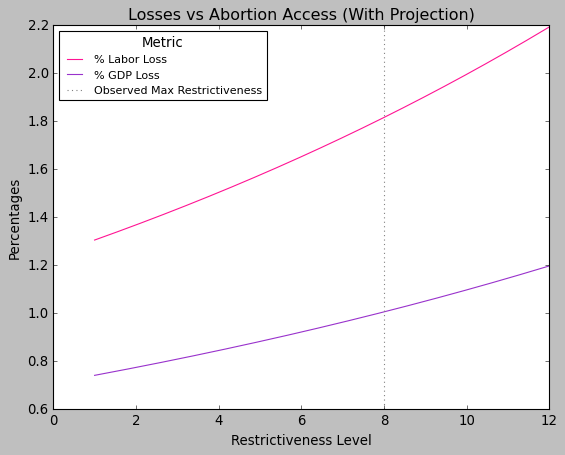

In [660]:
# extending to simulate more extreme restrictiveness scores 
x_future = np.linspace(min(x), max(x)*1.5, 200)

# predict y values using first fitted model
y_future = exp_model(x_future, a_fit, b_fit)

# predict y values using second fitted model
y_future1 = exp_model(x_future, a_fit1, b_fit1)

plt.plot(x_future, y_future, color='deeppink', label='% Labor Loss')
plt.plot(x_future, y_future1, color='darkorchid', label = '% GDP Loss')

plt.axvline(max(x), color='grey', linestyle=':', label='Observed Max Restrictiveness')

plt.xlabel('Restrictiveness Level')
plt.ylabel('Percentages')
plt.title('Losses vs Abortion Access (With Projection)')

plt.legend(
    title='Metric',
    loc='upper left',          
    fontsize='small',
    title_fontsize='medium',
)

plt.savefig("labor_loss_projection.pdf", dpi=300, bbox_inches='tight')
plt.show()

## Results

In [536]:
# printing parameters & pulling out r^2 values for each model
from sklearn.metrics import r2_score

print("Fitted parameters for labor loss:", a_fit, b_fit)
print("Fitted parameters for gdp loss:", a_fit1, b_fit1)

y_pred = exp_model(x_clean, a_fit, b_fit)  
r2 = r2_score(y_clean, y_pred)             
print("R² for labor loss:", r2)

y_pred1 = exp_model(x_clean1, a_fit1, b_fit1)  
r2_1 = r2_score(y_clean1, y_pred1)             
print("R² for GDP loss:", r2_1)

Fitted parameters for labor loss: 1.2438252946752768 0.04721162592643933
Fitted parameters for gdp loss: 0.7086093537845818 0.04362626340381673
R² for labor loss: 0.10513467343544736
R² for GDP loss: 0.10387704816760024


After fitting an exponential model to examine the relationship between abortion policy restrictiveness and two key economic outcomes, women’s labor force loss and GDP loss, the results showed relatively weak but still noteworthy associations.

For labor force loss, the fitted exponential curve had parameters:
- a = 1.24 and b = 0.047
  
This means that as abortion policy becomes more restrictive (higher on the restrictiveness scale), the expected labor force loss (%) increases at an exponential rate. However, the model’s explanatory power is modest, with an R² of approximately 0.105, suggesting that around 10.5% of the variation in labor force loss across states is explained by the restrictiveness of their abortion laws.

For GDP loss, the fitted curve had:
- a = 0.71 and b = 0.044
  
Similarly, this indicates that more restrictive abortion policies are associated with a higher economic burden. The R² of ~0.104 shows a similar level of explanatory power to the labor loss model. 

## Discussion and Conclusion


These results highlight that abortion access is likely one of many interconnected factors influencing economic outcomes, and more data over a longer period (especially post-Roe) would help build a more robust model. Still, even modest correlations like these underscore that restrictions may have measurable economic consequences, particularly for women of reproductive age.

The models showed a modest upward trend, with fitted parameters suggesting that as abortion restrictions increase, associated economic costs also rise, though at a gradual rate. Specifically, the model estimated:
- Labor force loss:
a = 1.24, b = 0.0472 (R² = 0.105)

- GDP loss:
a = 0.71, b = 0.0436 (R² = 0.104)

These R² values are low, meaning the models explain only about 10% of the variance in the data. This highlights the complexity of the relationship and suggests that abortion policy is just one of many factors contributing to labor force and GDP shifts. Other potential influences include the economic structure of each state, policy enforcement intensity, post-pandemic recovery differences, and delays between policy implementation and measurable economic outcomes.

However, even weak correlations may be meaningful. The exponential form of the model suggests a compounding effect: once restrictions reach a certain threshold, the economic ramifications, even if small in percentage terms, can translate to substantial numbers of affected women or millions of dollars in lost productivity. It’s also possible that after a certain level of restriction, the labor participation rate among women of reproductive age plateaus, as further policy severity makes participation infeasible.

Another key insight is that any level of restriction, not just total bans, appears associated with economic consequences. This supports the hypothesis that even moderate restrictions of reproductive autonomy can significantly impact women’s economic engagement.

Ultimately, while these findings are exploratory and should not be interpreted as causal, they do suggest a relationship worth investigating further. Incorporating causal inference methods and a broader dataset spanning multiple years could better capture these dynamics and isolate the true effect of policy change on economic outcomes.

## References

Browne, C. (2023). Abortion policy changes post-Dobbs. The Institute for Public Policy and Social Research, Correlates of State Policy Project.

Everett, B. G., & Taylor, C. J. (2024). Abortion and women’s future socioeconomic attainment. American Sociological Review, 89(6), 1044–1074. https://doi.org/10.1177/00031224241292058

Guttmacher Institute. (2025). State laws and policies status. https://www.guttmacher.org/state-laws-and-policies-status

Institute for Women’s Policy Research. (2022). 2022 analysis: Costs of reproductive health restrictions. https://iwpr.org/2022-analysis-costs-of-reproductive-health-restrictions/

Institute for Women’s Policy Research. (2024). 2024 analysis: Costs of reproductive health restrictions. https://iwpr.org/2024-analysis-costs-of-reproductive-health-restrictions/

NPR. (2024, August 27). The financial side of abortion access. https://www.npr.org/2024/08/27/nx-s1-4998884/the-financial-side-of-abortion-access